# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

The following resources were consulted during preparation of this project:
The c231n web site and lecture videos
This paper by Yann LeCun
Udacity's Slack forum and Confluence web site
Hvass laboratories' Youtube videos
The nanodegree lectures
Stackoverflow

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p" 
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:


print("Updated Train Image Shape: {}".format(X_train.shape))
print("Updated Validation Image Shape: {}".format(X_valid.shape))


Updated Train Image Shape: (34799, 32, 32, 3)
Updated Validation Image Shape: (4410, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))




print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)

print("Image data shape =", image_shape)
print("Number of classes = ", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes =  43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

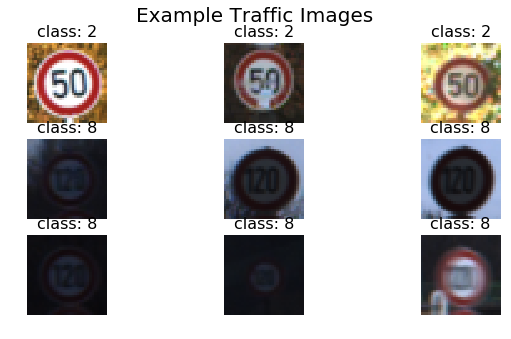

__________________________________________________________________________________________________
 This is data for Training Examples
__________________________________________________________________________________________________
Number of classes = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


Count across classes =  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]




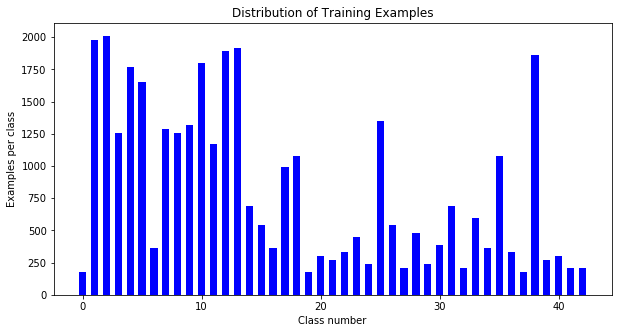

__________________________________________________________________________________________________
 This is data for Test Examples
__________________________________________________________________________________________________
Number of classes = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


Count across classes =  [ 60 720 750 450 660 630 150 450 450 480 660 420 690 720 270 210 150 360
 390  60  90  90 120 150  90 480 180  60 150  90 150 270  60 210 120 390
 120  60 690  90  90  60  90]




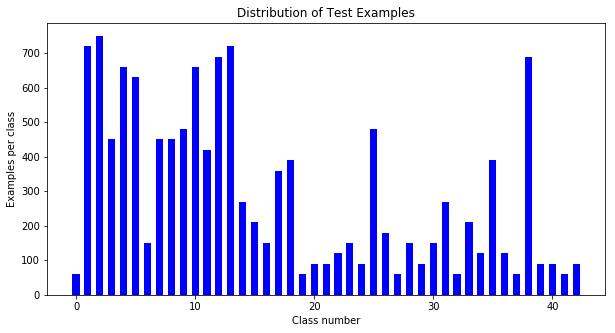

Shape of tensor for the training set : (34799, 32, 32, 3)
Shape of tensor for the test set: (12630, 32, 32, 3)
32


In [4]:
# Display datasets for various classes

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.layers import flatten

%matplotlib inline

# Visualizations will be shown in the notebook.


def imagedisplay(imgdataset, nrows, ncols, graph_title='Example Traffic Images'):
    '''
    Display Images
    '''
    
    plt.figure(figsize=(10, 5))
    selected_classes = np.random.randint(44, size=nrows)  # Total classes are 43
    image_number = 1
    for row in selected_classes:
        for col in range(1, ncols + 1):
            plt.subplot(nrows, ncols, image_number)
            image_number += 1
            x_selected = X_train[y_train == row]
            random_index = np.random.randint(x_selected.shape[0])
            plt.imshow(x_selected[random_index, :, :, :]) 
            plt.axis('off')
            plt.title('class: {}'.format(row), fontsize=16)  
    plt.suptitle(graph_title, fontsize=20)
    plt.show()

def draw_dist(class_labels,title):
    '''Plot distribution of examples across classes.'''
    plt.figure(figsize=(10, 5))

    classes, counts = np.unique(class_labels, return_counts=True)

    print("__________________________________________________________________________________________________")
    print(" This is data for",title )
    print("__________________________________________________________________________________________________")
    print("Number of classes =", classes)
    print("\n")
    print("Count across classes = ", counts)
    print("\n")
    plt.bar(classes, counts, width=0.6, color='blue', label='Examples per class')
    plt.xlabel('Class number')
    plt.ylabel('Examples per class')
    #plt.title('Distribution of Training Examples Amongst Classes')
    plt.title("Distribution of "+ title)
    plt.show()   
    
imagedisplay (X_train, 3, 3)
draw_dist(y_train,'Training Examples')
draw_dist(y_test, 'Test Examples')
print("Shape of tensor for the training set :", X_train.shape)
print("Shape of tensor for the test set:", X_test.shape)

print(X_train[0].shape[0])


In [5]:
import numpy as np

print(X_train[0].shape[0])
print(X_train[0].shape[1])
print(X_train[0].shape[2])


32
32
3


## Note on the Data Visualization

As can be seen above, there are 43 total number of classes or different types of traffic signs. There are some signs which have more examples than other signs. This is to be expected as on the road signs such as "Stop", "Right Turn" or "Left Turn" appear more than signs such as "Railway Crossing".

Another thing to observe is that the distribution of the training data is quiet similar to distribution of the test data. This is to be expected for the same reasons as noted above.

Each image is of size (32,32,3) with RGB values. The training data consists of 27,839 images while the test data consists of 12,360 images.


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

###### Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2

## RGB to Gray
def rgb2gray(images):
    """
    Convert batch of RGB images to grayscale using  average of R, G, B values
    Arguments:
        * Batch of RGB images, tensor of shape (batch_size, 32, 32, 3)
    Returns:
        * Batch of grayscale images, tensor of shape (batch_size, 32, 32, 1)
    """
    grayimage = np.average(images, axis=3)
    grayimage = np.expand_dims(grayimage, axis=3)
    return grayimage

### This function is for preprocessing of the data for normalization and one hot encoding
def preprocess(X):
    
    " Pre-process the data set with gray scale conversion and normalization etc. "
    " For image data, (pixel - 128)/ 128 is used to approximately normalize the data."
    
    X = X.astype('float32')
    Xgray = X   #rgb2gray(X)
    Xgray_norm = (Xgray - 127.5)/127.5
        
    return Xgray_norm

### Generate fake data by adding rotation to images
def img_rot(img):
    '''
    rotate the image
    '''
    x,y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 20.0*np.random.rand()-10
    Mat = cv2.getRotationMatrix2D((x, y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

print(" Total training data before rotation:-")
print(X_train.shape)
print("Min and Max values first sample of original train dataset", np.amin(X_train[0]), np.amax(X_train[0]))


# Add rotation to the images 
X_train_fake = []
y_train_fake = []
for i in range(len(X_train)):
    X_train_fake.append(img_rot(X_train[i]))
    y_train_fake.append(y_train[i])

X_train = np.concatenate((X_train, X_train_fake))
y_train = np.concatenate((y_train, y_train_fake))

Xorig_train = X_train
Xorig_test = X_test
Xorig_valid = X_valid

X_train = preprocess(X_train)
X_test = preprocess(X_test)
X_valid = preprocess(X_valid)


print("Min and Max values first sample of agumented train dataset", np.amin(Xorig_train[0]), np.amax(Xorig_train[0]))
print("Min and Max values first sample of normalized train dataset", np.amin(X_train[0]), np.amax(X_train[0]))

print(" Total training data after rotation:-")
print(X_train.shape)
print(" Total validation data after rotation:-")
print(X_valid.shape)

 Total training data before rotation:-
(34799, 32, 32, 3)
Min and Max values first sample of original train dataset 19 113
Min and Max values first sample of agumented train dataset 19 113
Min and Max values first sample of normalized train dataset -0.85098 -0.113725
 Total training data after rotation:-
(69598, 32, 32, 3)
 Total validation data after rotation:-
(4410, 32, 32, 3)


Index =  53645
Label =  10
-----------------
Color Image Size : (32, 32, 3)
Normalized Image Size: (32, 32, 3)


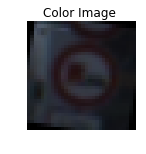

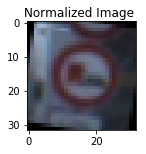

In [7]:
## Print Color and Gray Image
%matplotlib inline

index = random.randint(0, len(X_train))

print ("Index = ", index)
print("Label = ", y_train[index])
print("-----------------")
image1 = Xorig_train[index].squeeze()
image2 = X_train[index].squeeze()

fig = plt.figure(figsize=(2,2))
fig.suptitle("Color Image", fontsize=12)
plt.imshow(image1)
print("Color Image Size :",image1.shape)

plt.axis('off')

fig = plt.figure(figsize=(2,2))
fig.suptitle("Normalized Image", fontsize=12)
print("Normalized Image Size:",image2.shape)
plt.imshow(image2)




In [8]:
#print(Xpp_train.shape)
print(y_train.shape)

(69598,)


### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.



## Following Model is based on LeNet 

from tensorflow.contrib.layers import flatten

import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Define your architecture here.
### Feel free to use as many code cells as needed.


def LeNet1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


def LeNet2(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 14x14x12 Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # SOLUTION: Flatten. Input = 5x5x24. Output = 600.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 600. Output = 240.
    fc0_W = tf.Variable(tf.truncated_normal(shape=(600, 240), mean = mu, stddev = sigma))
    fc0_b = tf.Variable(tf.zeros(240))
    fc0   = tf.matmul(fc0, fc0_W) + fc0_b
    fc0   = tf.nn.relu(fc0)
    fc0   = tf.nn.dropout(fc0, keep_prob)   

    fc1_W = tf.Variable(tf.truncated_normal(shape=(240, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits




### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# some useful constants
LEARNING_RATE = 0.0005
EPOCHS = 20
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, shape=[None])
keep_prob = tf.placeholder(tf.float32, shape=None)
one_hot_y = tf.one_hot(y, 43)


logits = LeNet2(x,keep_prob)   # This is the best model 
#logits = LeNet1(x)            # This is the 2nd best model




cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.


In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [13]:
from sklearn.utils import shuffle


### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    train_log = []
    valid_log = []
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        train_accuracy = evaluate(X_train, y_train)
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print()
        
        train_log.append(train_accuracy)
        valid_log.append(validation_accuracy)
        
   
        
    saver = tf.train.Saver()
    saver.save(sess, './djlenet')
    print("Model saved")
    
    # Testing Accuracy
with tf.Session() as sess:
    saver.restore(sess, './djlenet')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3%}".format(test_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.820
Training Accuracy = 0.870

EPOCH 2 ...
Validation Accuracy = 0.907
Training Accuracy = 0.953

EPOCH 3 ...
Validation Accuracy = 0.928
Training Accuracy = 0.970

EPOCH 4 ...
Validation Accuracy = 0.951
Training Accuracy = 0.984

EPOCH 5 ...
Validation Accuracy = 0.959
Training Accuracy = 0.990

EPOCH 6 ...
Validation Accuracy = 0.951
Training Accuracy = 0.992

EPOCH 7 ...
Validation Accuracy = 0.958
Training Accuracy = 0.995

EPOCH 8 ...
Validation Accuracy = 0.961
Training Accuracy = 0.996

EPOCH 9 ...
Validation Accuracy = 0.961
Training Accuracy = 0.997

EPOCH 10 ...
Validation Accuracy = 0.954
Training Accuracy = 0.997

EPOCH 11 ...
Validation Accuracy = 0.957
Training Accuracy = 0.998

EPOCH 12 ...
Validation Accuracy = 0.963
Training Accuracy = 0.999

EPOCH 13 ...
Validation Accuracy = 0.959
Training Accuracy = 0.999

EPOCH 14 ...
Validation Accuracy = 0.955
Training Accuracy = 0.999

EPOCH 15 ...
Validation Accuracy = 0.962
Tra

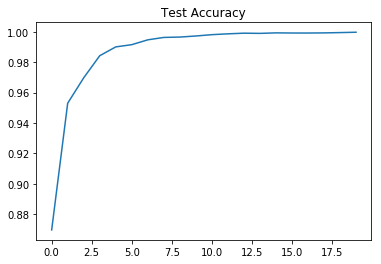

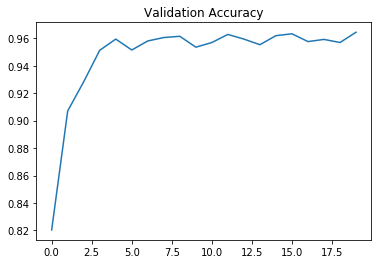

In [15]:
plt.plot(train_log)
plt.title("Test Accuracy")
plt.show()

plt.plot(valid_log)
plt.title("Validation Accuracy")
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(13, 32, 32, 3)


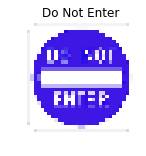

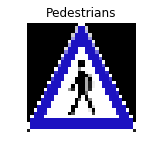

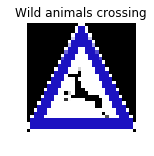

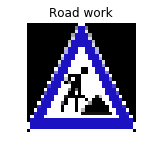

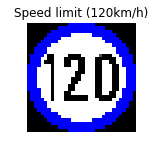

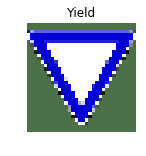

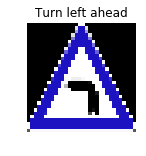

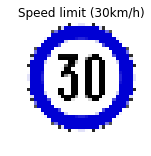

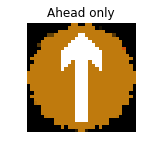

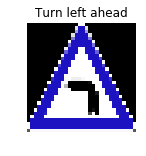

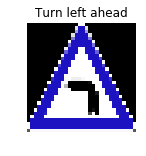

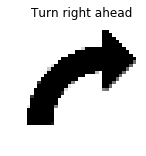

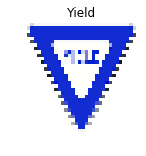

In [127]:
import pandas as pd
import glob
import matplotlib.image as mpimg
import csv
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import random
from sklearn.utils import shuffle
import tensorflow as tf

df_new_image_sign = pd.read_csv("new_images/newImages.csv")
image_new_list = []
for i in range(1,14):    
    im = cv2.imread("new_images/" + str(i) + ".png")
    
    im = cv2.resize(im, dsize = (32, 32))
    
    #im = cv2.resize(im, (32, 32), interpolation=cv2.INTER_CUBIC)
    plt.figure(figsize=(2,2))
    plt.imshow(im)
    plt.title(df_new_image_sign.iloc[i-1]['SignName'])
    plt.axis('off')
    
    image_new_list.append(im)

new_images = np.array(image_new_list)


print(new_images.shape)


Index =  0
Label =  17
-----------------
Color Image Size : (32, 32, 3)
Normalized Image Size: (32, 32, 3)


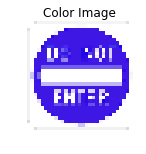

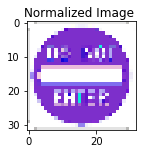

In [128]:
## Print Color and Gray Image
%matplotlib inline

my_labels = [17, 27, 31, 25, 28, 13, 34, 1, 35, 34, 19, 33, 13]
my_images = new_images

index = random.randint(0, 10)
index = 0

print ("Index = ", index)
print("Label = ", my_labels[index])
print("-----------------")
image1 = my_images[index]
image2 = preprocess(my_images[index].squeeze())

fig = plt.figure(figsize=(2,2))
fig.suptitle("Color Image", fontsize=12)
plt.imshow(image1)
print("Color Image Size :",image1.shape)

plt.axis('off')

fig = plt.figure(figsize=(2,2))
fig.suptitle("Normalized Image", fontsize=12)
print("Normalized Image Size:",image2.shape)
plt.imshow(image2)



### Predict the Sign Type for Each Image

In [131]:
my_images_norm = preprocess(my_images)
my_labels = [17, 27, 31, 25, 28, 13, 34, 1, 35, 34, 19, 33, 13]

print(my_images_norm.shape)

# Read sign names from file
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    sign_names = {rows[0]:rows[1] for rows in reader}


# Run against model
with tf.Session() as sess:
    saver.restore(sess, './djlenet')
    predictions = sess.run(tf.argmax(logits, 1), feed_dict={x:my_images_norm, y:my_labels, keep_prob:1})
    
    for i in range(0,12):
        print('\nImage ', i+1)
        print ('Prediction = ', str(predictions[i]))
        print('actual     = ', sign_names[str(my_labels[i])])
        print('prediction = ', sign_names[str(predictions[i])])
    
    print()
    my_accuracy = evaluate(my_images, my_labels)
    
print("Test Set Accuracy = {:.3f}".format(my_accuracy))

(13, 32, 32, 3)

Image  1
Prediction =  17
actual     =  No entry
prediction =  No entry

Image  2
Prediction =  11
actual     =  Pedestrians
prediction =  Right-of-way at the next intersection

Image  3
Prediction =  31
actual     =  Wild animals crossing
prediction =  Wild animals crossing

Image  4
Prediction =  25
actual     =  Road work
prediction =  Road work

Image  5
Prediction =  1
actual     =  Children crossing
prediction =  Speed limit (30km/h)

Image  6
Prediction =  13
actual     =  Yield
prediction =  Yield

Image  7
Prediction =  19
actual     =  Turn left ahead
prediction =  Dangerous curve to the left

Image  8
Prediction =  1
actual     =  Speed limit (30km/h)
prediction =  Speed limit (30km/h)

Image  9
Prediction =  25
actual     =  Ahead only
prediction =  Road work

Image  10
Prediction =  19
actual     =  Turn left ahead
prediction =  Dangerous curve to the left

Image  11
Prediction =  19
actual     =  Dangerous curve to the left
prediction =  Dangerous curve t

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [132]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './djlenet')
    top_k_images = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5) , feed_dict = {x : my_images_norm, keep_prob: 1})
print(top_k_images)

TopKV2(values=array([[  9.38286126e-01,   5.03726117e-02,   1.09861437e-02,
          2.40490001e-04,   7.12755937e-05],
       [  9.65560138e-01,   3.44373472e-02,   2.20132210e-06,
          3.12051327e-07,   8.47838244e-09],
       [  9.18835104e-01,   4.45684865e-02,   2.64533665e-02,
          9.79285315e-03,   2.14434054e-04],
       [  9.99984145e-01,   1.17452473e-05,   3.99217697e-06,
          2.19347007e-09,   2.69725686e-10],
       [  5.37272871e-01,   4.58884895e-01,   1.92630338e-03,
          1.16313470e-03,   5.87254937e-04],
       [  1.00000000e+00,   1.53952438e-21,   2.95961830e-22,
          5.94578762e-25,   2.37910450e-26],
       [  9.99989390e-01,   1.06248444e-05,   1.48401961e-13,
          4.39978356e-14,   1.40078362e-14],
       [  9.99677777e-01,   3.18780367e-04,   3.20572690e-06,
          1.51164400e-07,   8.76249402e-08],
       [  9.51109946e-01,   4.86950614e-02,   1.38849151e-04,
          2.12657887e-05,   1.59004758e-05],
       [  9.99989390e-0

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")